In [113]:
import pandas as pd
genuine_accounts_tweets = pd.read_csv('cresci-2017.csv/datasets_full.csv/genuine_accounts.csv/tweets.csv', low_memory=False)
traditional_spambots_1_tweets = pd.read_csv('cresci-2017.csv/datasets_full.csv/traditional_spambots_1.csv/tweets.csv', low_memory=False)
fake_followers_tweets=pd.read_csv('cresci-2017.csv/datasets_full.csv/fake_followers.csv/tweets.csv', low_memory=False)
social_spambots_3_tweets = pd.read_csv('cresci-2017.csv/datasets_full.csv/social_spambots_3.csv/tweets.csv', low_memory=False)
social_spambots_2_tweets = pd.read_csv('cresci-2017.csv/datasets_full.csv/social_spambots_2.csv/tweets.csv', low_memory=False)
russian_troll_tweets = pd.read_csv('russian-troll-tweets/tweets.csv', low_memory=False)

In [299]:
a = genuine_accounts_tweets
b= russian_troll_tweets
c= social_spambots_3_tweets

In [300]:
a['label']=int(0)
b['label']=int(1)
c['label']=int(1)

import random
a1 = a.sample(n=1000, random_state=1)
a2 = a.drop(index=a1.index).sample(n=1000, random_state=0)
b = b.sample(n=1000, random_state=1)
c = c.sample(n=1000, random_state=1)

In [301]:
ab=pd.concat([b, a1], axis=0)
ab_text = ab[['text', 'label']]
ab_text = ab_text.fillna('None')

ac=pd.concat([c, a2], axis=0)
ac_text=ac[['text', 'label']]
ac_text = ac_text.fillna('None')

/Users/xinchunli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [302]:
# clean content: 
from spacy.lang.en.stop_words import STOP_WORDS
import re
import os
def cleanContent(contents):
    contents_new=[]
    contents_list = contents.tolist()
    tweets_list_new=[]
    for tweet in contents_list:
        if 'http' in tweet:
            index = tweet.rfind('http')
            tweet = tweet.replace(tweet[index:], '')
        tweets_list_new.append(tweet)
    for content in tweets_list_new:
        # Convert to lowercase
        content_low=content.lower()
        # Remove punctuation and any other non-alphabet characters
        content_low_pnt = re.sub(r'[^\w\s]', '', content_low)
        content_low_pnt = content_low_pnt.replace(os.linesep, " ")
        content_low_pnt = content_low_pnt.replace("\t", " ")
        content_low_pnt_alpha = re.sub('[^A-Za-z\s]', '', content_low_pnt)
        # Remove stopwords
        words=content_low_pnt_alpha.split()
        no_stop_words=[word for word in words if word not in STOP_WORDS]
        content=' '.join(no_stop_words)
        contents_new.append(content)
    return contents_new

In [303]:
ab_text.text=cleanContent(ab_text.text)
ac_text.text=cleanContent(ac_text.text)

In [304]:
ab_text_list=[]
for text in ab_text.text:
    ab_text_list.append(text)

In [305]:
ab_text_list_string=""
for text in ab_text_list:
    ab_text_list_string+=text

In [306]:
ac_text_list=[]
for text in ac_text.text:
    ac_text_list.append(text)

In [307]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
data_corpus = ab_text_list
X = vectorizer.fit_transform(data_corpus) 
# traditional1_array=X.toarray() 
feature_names1=vectorizer.get_feature_names()

In [308]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False).fit(X)
X_tf = transformer.transform(X)

In [309]:
X_tf.columns=vectorizer.get_feature_names()

In [310]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(penalty="l1",random_state=0).fit(X_tf, ab_text.label)

In [311]:
## referred from https://medium.com/@aneesha/visualising-top-features-in-linear-svm-with-scikit-learn-and-matplotlib-3454ab18a14d

import numpy as np
top_features=20
coef = clf.coef_.ravel()
top_positive_coefficients = np.argsort(coef)[-top_features:]
featurenames=np.array(feature_names)[top_positive_coefficients]

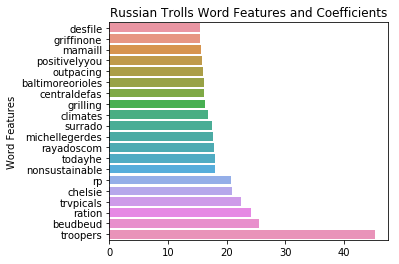

In [325]:
import seaborn as sns
import matplotlib.pyplot as plt

top_positive_coefficients = np.argsort(coef)[-top_features:]

ax=sns.barplot(x=coef[top_positive_coefficients],y=feature_names[top_positive_coefficients])
ax.set_title('Russian Trolls Word Features and Coefficients')
ax.set_ylabel('Word Features')
plt.rcParams['figure.figsize'] = (5.0, 4.0) 
